In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

# Initialization

In [2]:
n = 10000  # number of samples
d = 128  # input dimension
k = 2  # number of hidden nodes
print(f"Current oversampling: {n / d}")

X = np.random.randn(d, n) + 1j * np.random.randn(d, n)  # inputs
T_true = np.random.randn(k, d) + 1j * np.random.randn(k, d)  # weight matrix
W = np.array(np.linspace(start=0.5, stop=1., num=k))  # second layer coefficients, must be of size k

y = W @ (np.abs(T_true @ X) ** 2)  # measured total intensities

Current oversampling: 78.125


# Reconstruction

In [3]:
Z = X.conj() @ np.diag(y) @ X.T  # weighted covariance matrix

from scipy.linalg import eigh
lmax, xmax = eigh(Z, subset_by_index=[d-k, d-1])  # compute the 2 largest eigenvectors
T_est = xmax.T

# Evaluation

In [4]:
corr = np.zeros(k)
for i in range(k):
    t_true = T_true[i, :]
    t_est = T_est[i, :]
    corr[i] = np.abs(t_true.T.conj() @ t_est) / np.linalg.norm(t_true) / np.linalg.norm(t_est)
    print(f"Index {i} correlation: {corr[i]}")

Index 0 correlation: 0.8438806466387326
Index 1 correlation: 0.9403728801680586


# Loop on k

In [12]:
from tqdm import tqdm
n = 10000  # number of samples
d = 256  # input dimension
print(f"Current oversampling: {n / d}")

k_max = 10
corr_mat = np.zeros((k_max, k_max))
for k in tqdm(range(1, k_max+1)):  # number of hidden nodes
    X = np.random.randn(d, n) + 1j * np.random.randn(d, n)  # inputs
    T_true = np.random.randn(k, d) + 1j * np.random.randn(k, d)  # weight matrix
    W = np.array(np.linspace(start=0.5, stop=1., num=k))  # second layer coefficients, must be of size k

    y = W @ (np.abs(T_true @ X) ** 2)  # measured total intensities
    Z = X.conj() @ np.diag(y) @ X.T  # weighted covariance matrix

    lmax, xmax = eigh(Z, subset_by_index=[d-k, d-1])  # compute the 2 largest eigenvectors
    T_est = xmax.T
    for i in range(k):
        t_true = T_true[i, :]
        t_est = T_est[i, :]
#         corr_mat[k, i] = np.abs(t_true.T.conj() @ t_est) / np.linalg.norm(t_true) / np.linalg.norm(t_est)
        
        
        max_corr = 0
        for j in range(k):
            t_true = T_true[j, :]
            curr_corr = np.abs(t_true.T.conj() @ t_est) / np.linalg.norm(t_true) / np.linalg.norm(t_est)
            if curr_corr > max_corr:
                max_idx = j
                max_corr = curr_corr
        corr_mat[k-1, i] = max_corr
#         print(f"Index {i} correlation (with {max_idx}): {max_corr}")
        print(f"Index {i} correlation (with {max_idx}): {corr_mat[k-1, i]}")

  0%|          | 0/10 [00:00<?, ?it/s]

Current oversampling: 39.0625


 10%|█         | 1/10 [00:45<06:47, 45.24s/it]

Index 0 correlation (with 0): 0.9370421856679441


 20%|██        | 2/10 [01:30<06:02, 45.33s/it]

Index 0 correlation (with 0): 0.6918596362509769
Index 1 correlation (with 1): 0.8924769350625711


 30%|███       | 3/10 [02:16<05:17, 45.33s/it]

Index 0 correlation (with 0): 0.5759416054665832
Index 1 correlation (with 1): 0.7717842244314287
Index 2 correlation (with 2): 0.8093606563698111


 40%|████      | 4/10 [03:01<04:31, 45.32s/it]

Index 0 correlation (with 1): 0.19280346296508602
Index 1 correlation (with 1): 0.4066745550420081
Index 2 correlation (with 2): 0.6159879325300365
Index 3 correlation (with 3): 0.6963642688339281


 50%|█████     | 5/10 [03:46<03:46, 45.31s/it]

Index 0 correlation (with 0): 0.21986234008279107
Index 1 correlation (with 1): 0.3104584106625213
Index 2 correlation (with 2): 0.4026419385743144
Index 3 correlation (with 3): 0.5412799860599823
Index 4 correlation (with 4): 0.7342237003591683


 60%|██████    | 6/10 [04:31<03:01, 45.29s/it]

Index 0 correlation (with 3): 0.12654767387349894
Index 1 correlation (with 1): 0.3091013041217881
Index 2 correlation (with 5): 0.3102792419201167
Index 3 correlation (with 2): 0.30763904766091094
Index 4 correlation (with 3): 0.3988031981697586
Index 5 correlation (with 4): 0.558024146975763


 70%|███████   | 7/10 [05:16<02:15, 45.18s/it]

Index 0 correlation (with 1): 0.1271996735627917
Index 1 correlation (with 1): 0.2405793278591104
Index 2 correlation (with 3): 0.14000818250921016
Index 3 correlation (with 5): 0.3271958559490666
Index 4 correlation (with 6): 0.3440495194754174
Index 5 correlation (with 6): 0.4371096516360009
Index 6 correlation (with 4): 0.5636981143945294


 80%|████████  | 8/10 [06:01<01:30, 45.17s/it]

Index 0 correlation (with 4): 0.1989275084704613
Index 1 correlation (with 3): 0.2385278095458983
Index 2 correlation (with 1): 0.22472230928491344
Index 3 correlation (with 2): 0.2462477802235146
Index 4 correlation (with 4): 0.30798625058912066
Index 5 correlation (with 7): 0.35017954800064754
Index 6 correlation (with 6): 0.27553765608460173
Index 7 correlation (with 6): 0.2924243571480628


 90%|█████████ | 9/10 [06:47<00:45, 45.13s/it]

Index 0 correlation (with 6): 0.1641009394042537
Index 1 correlation (with 3): 0.16679299498154837
Index 2 correlation (with 7): 0.1840267332444747
Index 3 correlation (with 4): 0.19932815331253068
Index 4 correlation (with 4): 0.27002383311833966
Index 5 correlation (with 6): 0.20062290592289117
Index 6 correlation (with 5): 0.23896772328975127
Index 7 correlation (with 8): 0.35847148120107863
Index 8 correlation (with 7): 0.32678812124764317


100%|██████████| 10/10 [07:32<00:00, 45.20s/it]

Index 0 correlation (with 8): 0.1989211046717214
Index 1 correlation (with 7): 0.13281319470950195
Index 2 correlation (with 1): 0.16414900415866035
Index 3 correlation (with 9): 0.1945041217969702
Index 4 correlation (with 5): 0.2257066542425926
Index 5 correlation (with 8): 0.21373048025248936
Index 6 correlation (with 5): 0.22946456061131648
Index 7 correlation (with 7): 0.309703049905635
Index 8 correlation (with 4): 0.3455691995995561
Index 9 correlation (with 8): 0.460657518946858


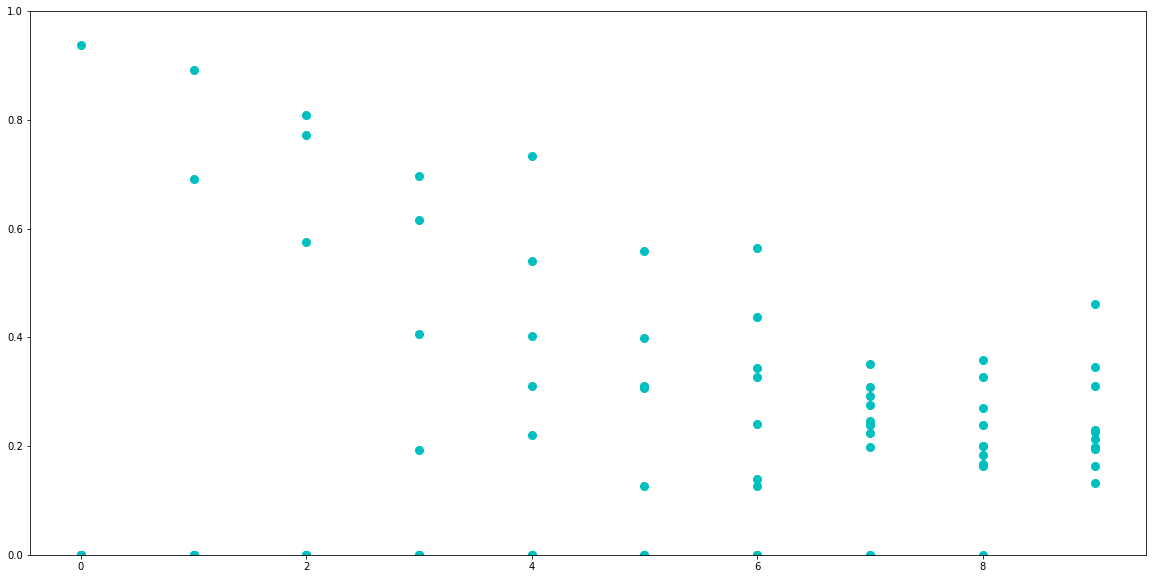

In [43]:
plt.figure(figsize=(20,10))
plt.plot(corr_mat, '.c', markersize=16)
plt.ylim([0, 1]);